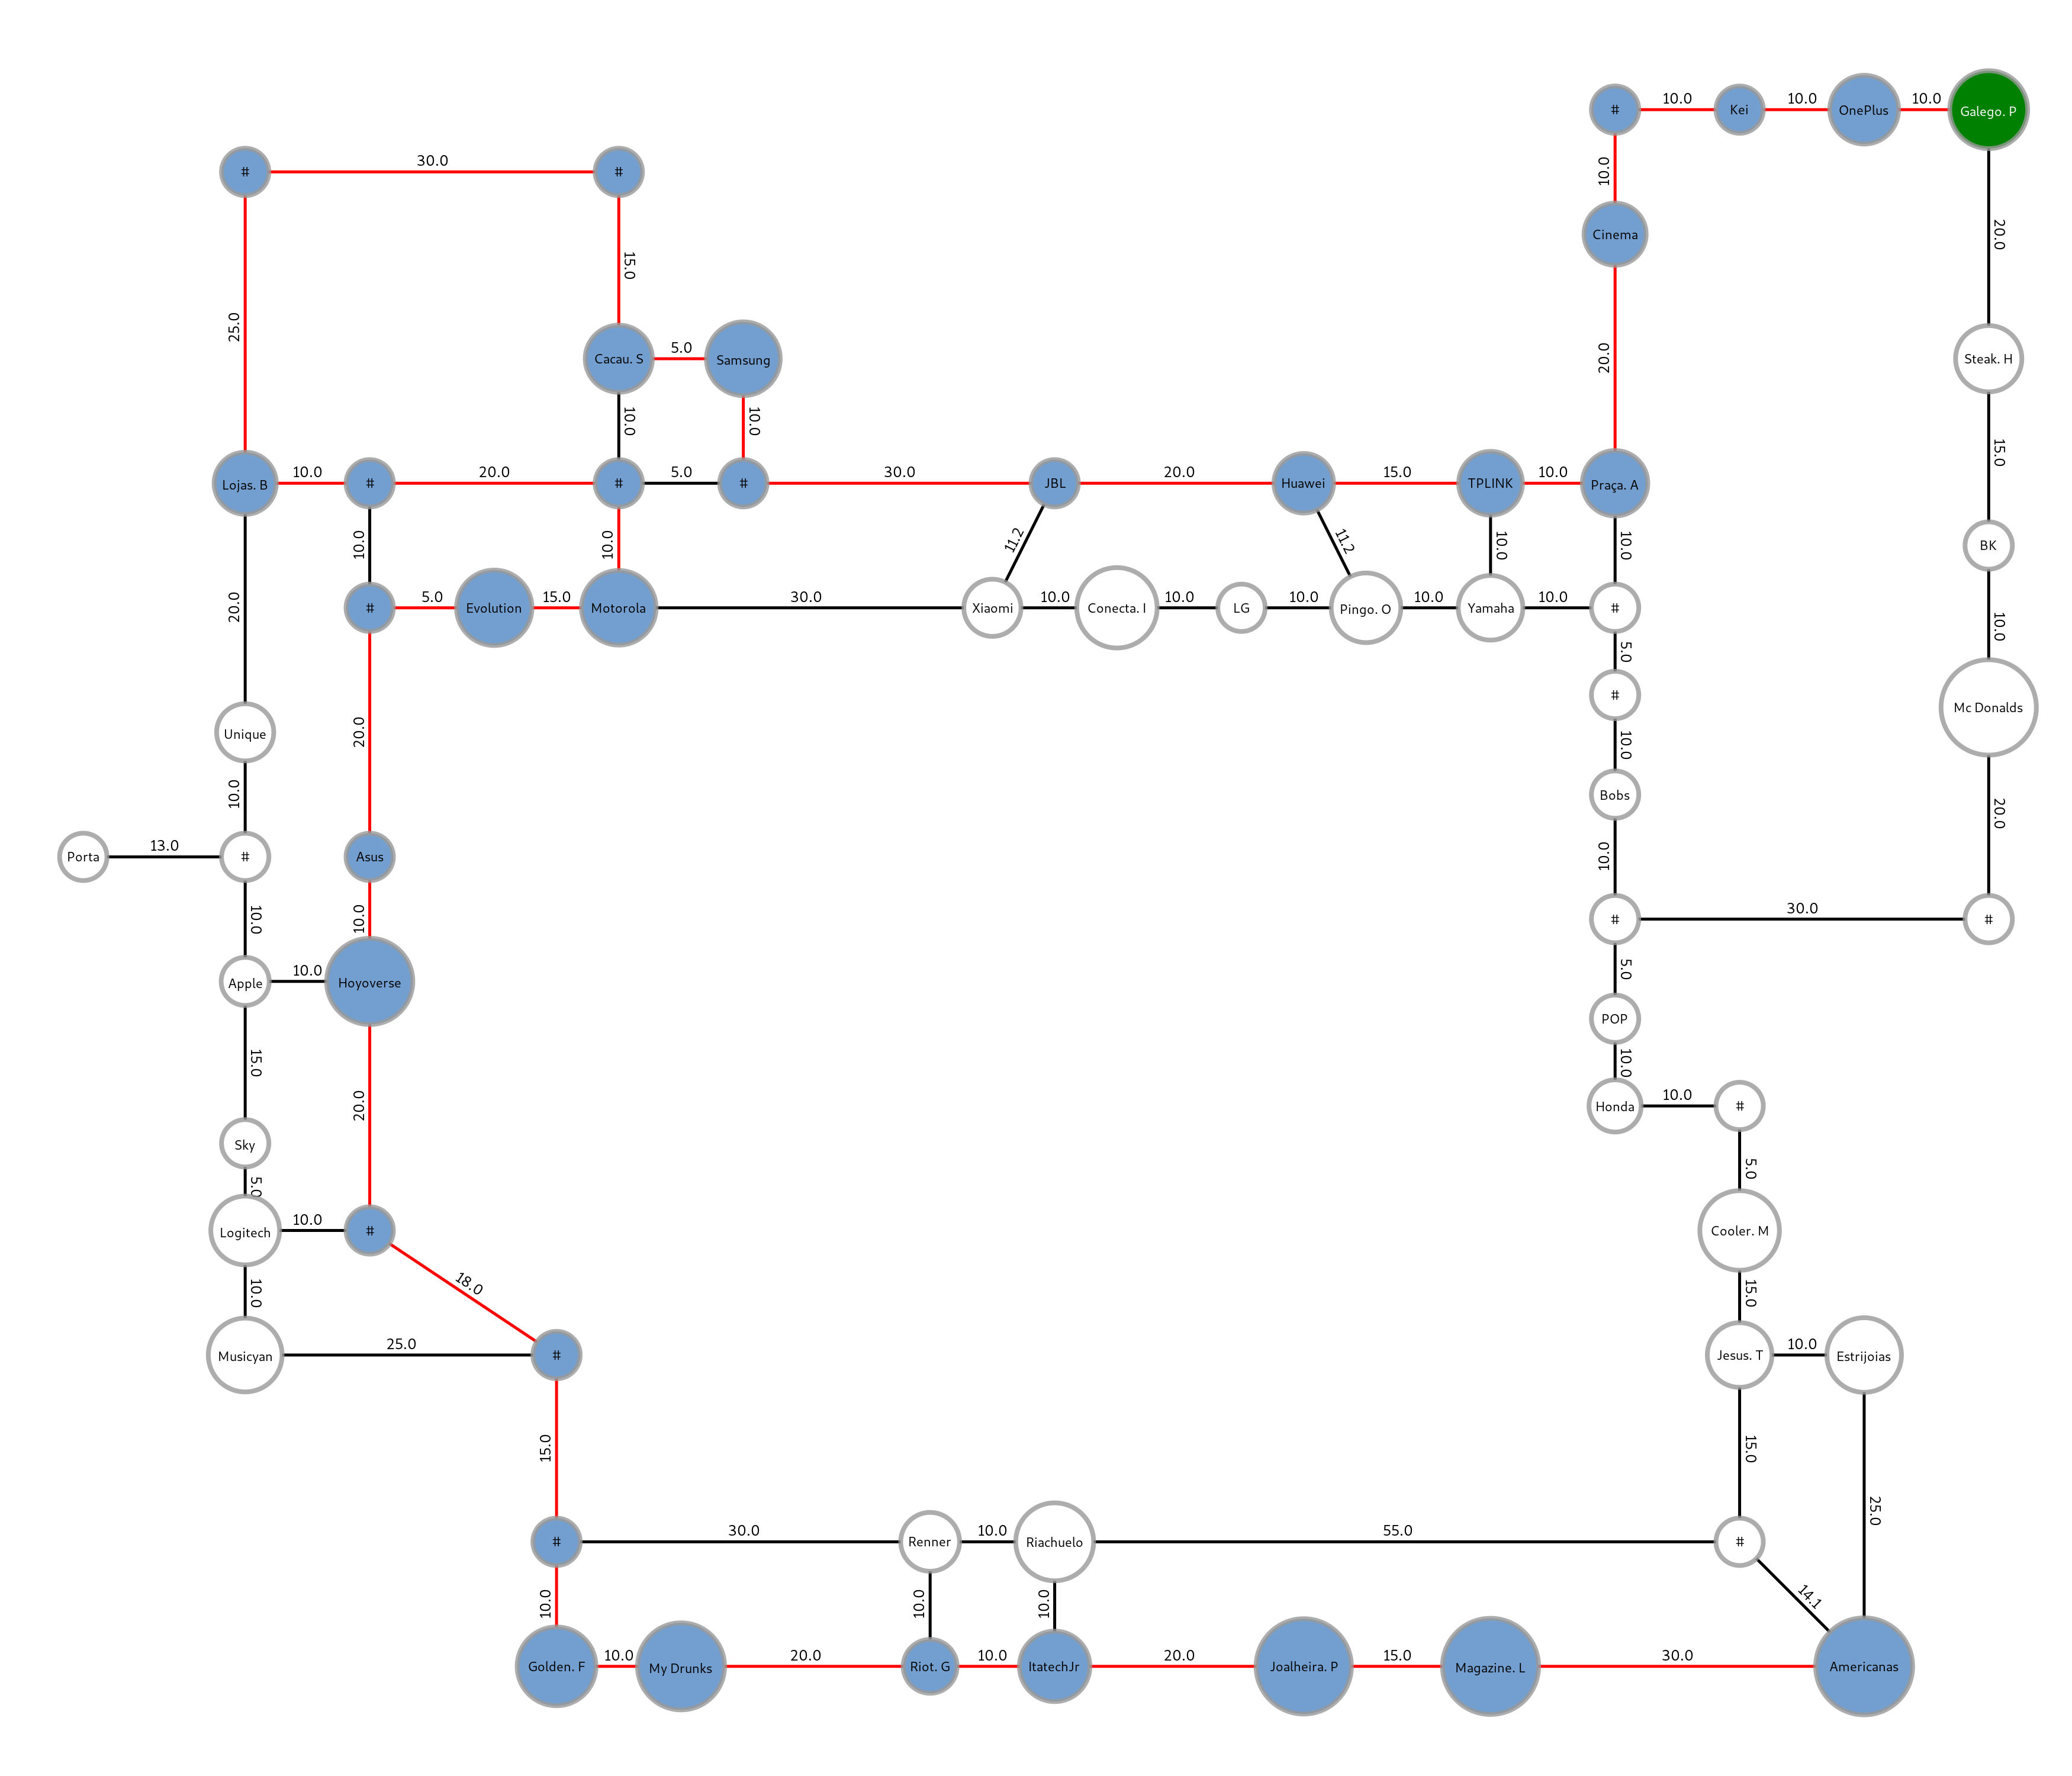

In [38]:
import graph_tool.all as gt                       # Biblioteca para GRAFO
import csv   

def read_path(file_name):
    file = open(file_name)

    path = [] 
    for line in file:
        path = line.split(",")
        break
    
    #transform in int
    path = [int(p) for p in path]
        
    file.close()
    return path
        
def draw_path():
    # Biblioteca para Leitura do csv
    g = gt.Graph() 
    g.set_directed(False)                             # criação do objeto
    v_name = g.new_vertex_property("string")          # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string  
    v_pos  = g.new_vertex_property("vector<double>")
    e_distance = g.new_edge_property("string") 
    e_weight = g.new_edge_property("float")  
    e_action = g.new_edge_property("string") 
    bfse_color = g.new_edge_property("string")  
    bfsv_color = g.new_vertex_property("string") 

    #Criação dos vértices no grafo à partir do arquivo .csv de vértices
    f_network = open("vertices.csv", 'r', encoding='utf-8')
    reader_network = csv.reader(f_network, delimiter=",")

    vposX = []
    vposY = []
    distancias = []
    for vertice in reader_network:
        v = g.add_vertex()
        v_name[v] = str(vertice[1]) # Adicionando nome do vertice
        vposX.append(vertice[3]) # Adicionando posição X
        vposY.append(vertice[4]) # Adicionando posição Y
    f_network.close()
    
    

    #Criação das arestas no grafo à partir do arquivo .cvs de arestas
    f_network = open("arestas.csv", 'r', encoding='utf-8')
    reader_network = csv.reader(f_network, delimiter=",")
    for edge in reader_network:
        e = g.add_edge(int(edge[0]), int(edge[1]))
        bfse_color[e] = "black"
        e_distance[e] = str(edge[2])

    f_network.close()
            

    #Preenchendo as posições X e Y dos vértices
    for v in g.vertices():
        v_pos[v] = (vposX[int(v)],vposY[int(v)])
    #Pintando os vertices
    for v in g.vertices():
        bfsv_color[v] = "white"
    #Pintando as arestas
    for e in g.edges():
        bfse_color[e] = "black"
    
    id_caminho = [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17 ]
            
    #Pintando o caminho
    destino = id_caminho[-1] #pegando o id do destino
    edge = []
    g1 = gt.Graph() 
    g1.set_directed(False) 
    for i in range(len(id_caminho)-1):
        e = g1.add_edge(id_caminho[i], id_caminho[i+1])
        edge.append(e)

    for e in g.edges():
        source_node, target_node = e  # Desempacota a tupla de nós da aresta
        for i in range(len(id_caminho)-1):
            source_path, target_path = edge[i]
            if source_node == source_path and target_node == target_path:
                    bfse_color[e] = "red"
   
    #pintndo os vertices de azul
    for v in g.vertices(): 
        if v in id_caminho: #comparando se o id do vertice esta no caminho
            bfsv_color[v] = "#729fcf" # pintando o vertice de azul
            if v == destino:
                bfsv_color[v] = "green"      
        

    gt.graph_draw(g, pos=v_pos,
                   vertex_text= v_name,
                   edge_text = e_distance,
                   edge_color= bfse_color,
                   edge_pen_width = 5, 
                   vertex_font_size=22,
                   edge_font_size = 25,
                   vertex_size = 80,
                   vertex_shape="circle",
                   vertex_fill_color=bfsv_color,
                   output_size=(3500, 3000))
        
draw_path() 
    